# Income Prediction

#### In this case study , we will predict the income of the population on the basis of several features by building a Decision Tree Model with default hyperparameteres and then improving it using GridSearch and KFold Cross Validation by getting optimal hyperparameters

#### Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Data

In [2]:
data = pd.read_csv('adult_dataset.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Cleaning

In [4]:
# Checking  any column having null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
# We observe that there are no null values but the values "?" are treated as null values . 
#So lets clean the data
df = data.select_dtypes(include=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
workclass         32561 non-null object
education         32561 non-null object
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
native.country    32561 non-null object
income            32561 non-null object
dtypes: object(9)
memory usage: 2.2+ MB


In [6]:
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [7]:
df.apply(lambda x: x=='?',axis=0).sum()

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

In [8]:
# Removing the rows with entry '?'
df=df[df['workclass'] != '?']
df1=data[data['workclass'] != '?']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 9 columns):
workclass         30725 non-null object
education         30725 non-null object
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
native.country    30725 non-null object
income            30725 non-null object
dtypes: object(9)
memory usage: 2.3+ MB


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 1 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital.gain      30725 non-null int64
capital.loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30725 non-null object
income            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [11]:
df.apply(lambda x: x=='?',axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [12]:
df = df[df['occupation'] != '?']
df1 = df1[df1['occupation'] != '?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 9 columns):
workclass         30718 non-null object
education         30718 non-null object
marital.status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
native.country    30718 non-null object
income            30718 non-null object
dtypes: object(9)
memory usage: 2.3+ MB


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education.num     30718 non-null int64
marital.status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital.gain      30718 non-null int64
capital.loss      30718 non-null int64
hours.per.week    30718 non-null int64
native.country    30718 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.apply(lambda x : x=='?' ,axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [15]:
df = df[df['native.country'] != '?']
df1= df1[df1['native.country'] != '?']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 9 columns):
workclass         30162 non-null object
education         30162 non-null object
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
native.country    30162 non-null object
income            30162 non-null object
dtypes: object(9)
memory usage: 2.3+ MB


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df.apply(lambda x : x=='?',axis=0).sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [18]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


## Data Preprocessing

#### Decoding the categorial values

In [19]:
df_cat = df1.select_dtypes(include = 'object')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)

In [20]:
df1 = df1.drop(df_cat.columns,axis=1)
salary = pd.concat([df1, df_cat],axis = 1)

In [21]:
pd.set_option('display.max_columns',500)
salary.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [22]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
fnlwgt            30162 non-null int64
education.num     30162 non-null int64
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
workclass         30162 non-null int64
education         30162 non-null int64
marital.status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
native.country    30162 non-null int64
income            30162 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


### Making Decision Tree Model and Predicting it with default parameters

In [23]:
X = salary.drop(['income'],axis=1)
Y = salary['income']
from sklearn.model_selection import train_test_split as tt
X_train , X_test, Y_train , Y_test = tt(X,Y, test_size = 0.3 ,random_state = 100)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =5)
dt.fit(X_train , Y_train)
y_pred = dt.predict(X_test)

In [25]:
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score
classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90      6774\n           1       0.77      0.50      0.61      2275\n\n   micro avg       0.84      0.84      0.84      9049\n   macro avg       0.81      0.73      0.75      9049\nweighted avg       0.83      0.84      0.83      9049\n'

In [26]:
print(confusion_matrix(Y_test, y_pred))

[[6438  336]
 [1127 1148]]


In [27]:
print(accuracy_score(Y_test , y_pred))

0.838324676759863


### Grid Search Function to find the optimal hyperparameters

In [28]:
def GridSearch(x, y, n_folds,parameters):
    from sklearn.model_selection import KFold
    from sklearn.model_selection import GridSearchCV
    folds = n_folds
    param = parameters
    tree = DecisionTreeClassifier(random_state = 100 , criterion ='gini')
    grid_search = GridSearchCV(estimator=tree, param_grid = param ,cv=folds, scoring ='accuracy')
    grid_search.fit(x,y)
    score = grid_search.cv_results_
    score=pd.DataFrame(score)
    print('Accuracy = ',grid_search.best_score_)
    print(grid_search.best_estimator_)
    return score

In [29]:
def plot_data(data,parameter):
    plt.figure(figsize=(20,10))
    plt.plot(data[parameter],data['mean_train_score'],label='mean_train_error')
    plt.plot(data[parameter],data['mean_test_score'],label='mean_test_error')
    plt.title('Train vs Test Error',fontsize=50)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(parameter,fontsize=30)
    plt.ylabel('Train and Test Error',fontsize=30)
    plt.legend(fontsize=20)
    return plt.show()

Accuracy =  0.8495239899587932
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.023741,0.000551,0.001715,0.000186,2,{'max_depth': 2},0.824337,0.816288,0.825758,0.824254,0.819043,0.828517,0.829938,0.818096,0.821412,0.829465,0.823711,0.004621,8,0.823641,0.824536,0.823483,0.823650,0.824229,0.823177,0.823019,0.824334,0.823966,0.823071,0.823711,0.000513
1,0.040138,0.000837,0.001755,0.000126,4,{'max_depth': 4},0.847064,0.826231,0.846117,0.843676,0.838939,0.849360,0.851255,0.843676,0.843676,0.845097,0.843509,0.006601,4,0.843271,0.845587,0.843429,0.843595,0.844174,0.843017,0.842806,0.843648,0.843648,0.843490,0.843667,0.000732
2,0.055643,0.000987,0.001785,0.000179,6,{'max_depth': 6},0.851326,0.833807,0.854640,0.847939,0.841781,0.853150,0.857414,0.846992,0.847939,0.853624,0.848861,0.006601,3,0.851797,0.856008,0.853902,0.852384,0.853068,0.853489,0.852384,0.851647,0.854384,0.851489,0.853055,0.001353
3,0.068921,0.001871,0.001735,0.000028,8,{'max_depth': 8},0.853693,0.837121,0.850379,0.846045,0.846518,0.853150,0.861203,0.845571,0.845571,0.855992,0.849524,0.006448,1,0.860586,0.860692,0.859165,0.860225,0.862383,0.860173,0.859857,0.859804,0.862120,0.859225,0.860423,0.001032
4,0.084861,0.001368,0.001885,0.000196,10,{'max_depth': 10},0.852273,0.837121,0.857955,0.841307,0.845097,0.850782,0.855045,0.851729,0.848413,0.850308,0.849003,0.005964,2,0.871007,0.871428,0.870481,0.871329,0.871750,0.870750,0.870803,0.869908,0.872592,0.869961,0.871001,0.000777


###  Predicting hyperparameters individually

In [44]:
# HyperParameter 'max_depth'
score = GridSearch(X_train,Y_train,10,{'max_depth':range(2,30,2)})
score.head()

Accuracy =  0.8495239899587932
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.043408,0.059473,0.001669,0.000099,2,{'max_depth': 2},0.824337,0.816288,0.825758,0.824254,0.819043,0.828517,0.829938,0.818096,0.821412,0.829465,0.823711,0.004621,8,0.823641,0.824536,0.823483,0.823650,0.824229,0.823177,0.823019,0.824334,0.823966,0.823071,0.823711,0.000513
1,0.040147,0.000684,0.001861,0.000248,4,{'max_depth': 4},0.847064,0.826231,0.846117,0.843676,0.838939,0.849360,0.851255,0.843676,0.843676,0.845097,0.843509,0.006601,4,0.843271,0.845587,0.843429,0.843595,0.844174,0.843017,0.842806,0.843648,0.843648,0.843490,0.843667,0.000732
2,0.057773,0.002021,0.001791,0.000174,6,{'max_depth': 6},0.851326,0.833807,0.854640,0.847939,0.841781,0.853150,0.857414,0.846992,0.847939,0.853624,0.848861,0.006601,3,0.851797,0.856008,0.853902,0.852384,0.853068,0.853489,0.852384,0.851647,0.854384,0.851489,0.853055,0.001353
3,0.074748,0.007290,0.002000,0.000354,8,{'max_depth': 8},0.853693,0.837121,0.850379,0.846045,0.846518,0.853150,0.861203,0.845571,0.845571,0.855992,0.849524,0.006448,1,0.860586,0.860692,0.859165,0.860225,0.862383,0.860173,0.859857,0.859804,0.862120,0.859225,0.860423,0.001032
4,0.088975,0.008247,0.001965,0.000227,10,{'max_depth': 10},0.852273,0.837121,0.857955,0.841307,0.845097,0.850782,0.855045,0.851729,0.848413,0.850308,0.849003,0.005964,2,0.871007,0.871428,0.870481,0.871329,0.871750,0.870750,0.870803,0.869908,0.872592,0.869961,0.871001,0.000777


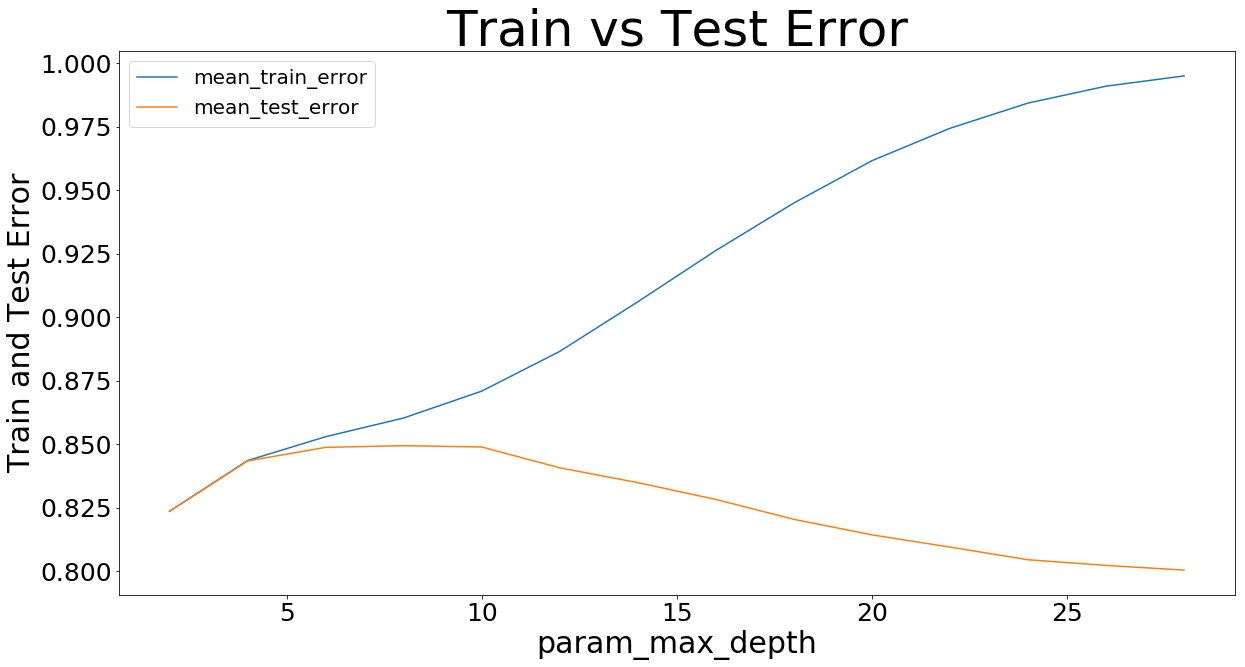

In [31]:
# Hyperparameter 'max_depth'
plot_data(score,'param_max_depth')

In [32]:
# HyperParameter 'min_samples_leaf'
leafs = GridSearch(X_train , Y_train ,10,{'min_samples_leaf': range(5,150,10)})
leafs.head()

Accuracy =  0.8535499455311893
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=35, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.118327,0.004509,0.002339,0.000397,5,{'min_samples_leaf': 5},0.838068,0.812500,0.817708,0.816201,0.816201,0.817622,0.832307,0.845097,0.819517,0.825201,0.824042,0.010333,15,0.914531,0.913636,0.913689,0.915746,0.914641,0.913272,0.913483,0.913535,0.914167,0.913535,0.914023,0.000722
1,0.104852,0.004356,0.002112,0.000252,15,{'min_samples_leaf': 15},0.848011,0.832386,0.845170,0.843676,0.841307,0.843202,0.851729,0.857887,0.838939,0.842729,0.844503,0.006615,14,0.879217,0.880901,0.879270,0.881118,0.880855,0.879592,0.879697,0.880013,0.880644,0.879592,0.880090,0.000685
2,0.096217,0.002833,0.001922,0.000098,25,{'min_samples_leaf': 25},0.853693,0.836648,0.851799,0.842255,0.839886,0.847466,0.856940,0.858361,0.851255,0.848887,0.848719,0.006844,13,0.870375,0.872112,0.869481,0.870961,0.870329,0.871277,0.870277,0.870014,0.871908,0.870119,0.870685,0.000811
3,0.095886,0.006080,0.002039,0.000294,35,{'min_samples_leaf': 35},0.857481,0.844223,0.855587,0.844623,0.845571,0.855992,0.867361,0.855045,0.854098,0.855519,0.853550,0.006731,1,0.866218,0.867954,0.866375,0.867488,0.866435,0.867751,0.865488,0.865856,0.866909,0.865961,0.866644,0.000803
4,0.089029,0.003498,0.001941,0.000192,45,{'min_samples_leaf': 45},0.857008,0.841383,0.859848,0.849834,0.839413,0.855992,0.866414,0.856466,0.852676,0.855519,0.853455,0.007732,2,0.862428,0.865218,0.862323,0.864172,0.863067,0.864172,0.861857,0.863330,0.864909,0.862804,0.863428,0.001083


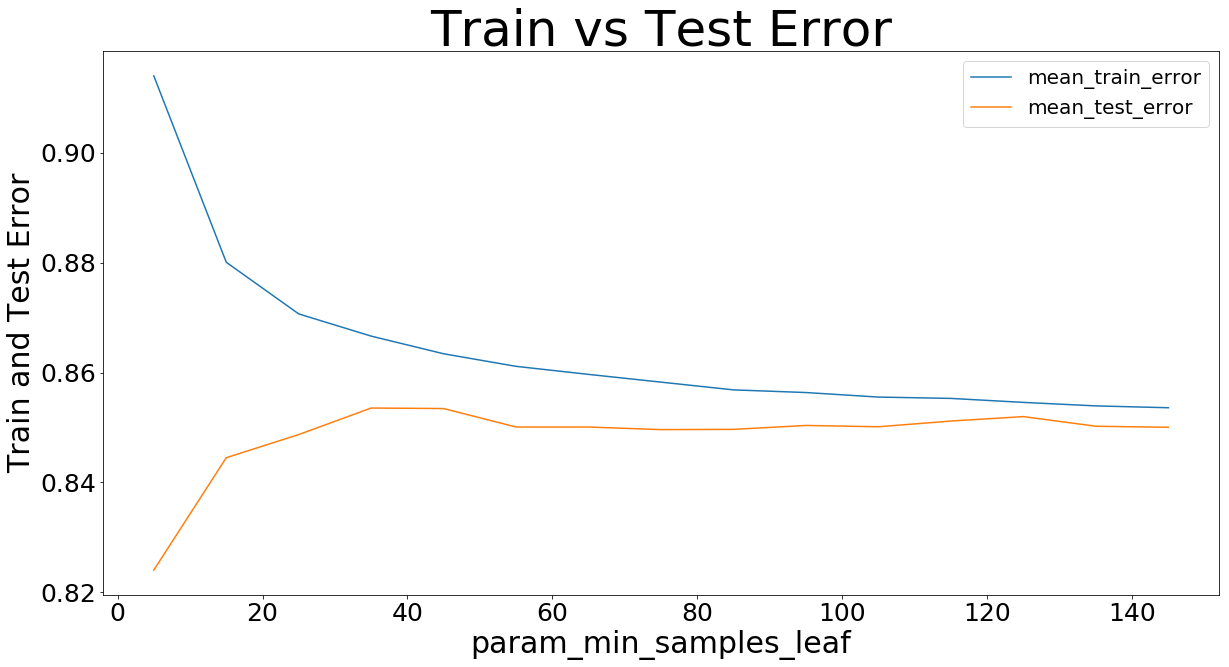

In [33]:
plot_data(leafs,'param_min_samples_leaf')

In [34]:
# HyperParameter 'min_samples_split'
splits = GridSearch(X_train,Y_train,10,{'min_samples_split': range(5,150,10)})
splits.head()

Accuracy =  0.8492398048595652
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=135,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.126251,0.004683,0.002146,0.000231,5,{'min_samples_split': 5},0.813447,0.807765,0.802083,0.799621,0.802937,0.802937,0.806253,0.821885,0.804358,0.815727,0.807701,0.006739,15,0.969896,0.969212,0.969896,0.971371,0.971582,0.969214,0.967688,0.969003,0.968530,0.971003,0.969740,0.001203
1,0.119925,0.003120,0.002050,0.000142,15,{'min_samples_split': 15},0.838542,0.815341,0.811553,0.807674,0.817622,0.819517,0.830412,0.833728,0.813832,0.832307,0.822053,0.010193,14,0.926057,0.923478,0.926162,0.925587,0.925008,0.925745,0.925166,0.925218,0.926166,0.925429,0.925401,0.000754
2,0.119170,0.003018,0.002162,0.000227,25,{'min_samples_split': 25},0.837595,0.814394,0.824337,0.814306,0.823306,0.815727,0.837044,0.835623,0.822833,0.838939,0.826410,0.009549,13,0.907794,0.907584,0.909057,0.910062,0.908220,0.910167,0.908694,0.908273,0.907483,0.909325,0.908666,0.000921
3,0.115001,0.003598,0.002018,0.000126,35,{'min_samples_split': 35},0.847538,0.821023,0.837595,0.821412,0.821412,0.823780,0.846518,0.844150,0.831833,0.841781,0.833704,0.010536,12,0.897847,0.897742,0.898584,0.900063,0.899274,0.899905,0.898326,0.898958,0.899747,0.899484,0.898993,0.000797
4,0.115282,0.007258,0.002082,0.000206,45,{'min_samples_split': 45},0.852746,0.822443,0.832860,0.815727,0.822833,0.834202,0.847939,0.846045,0.844150,0.846045,0.836499,0.012124,11,0.890690,0.893216,0.891322,0.892959,0.891169,0.893959,0.890854,0.891590,0.892117,0.891117,0.891899,0.001062


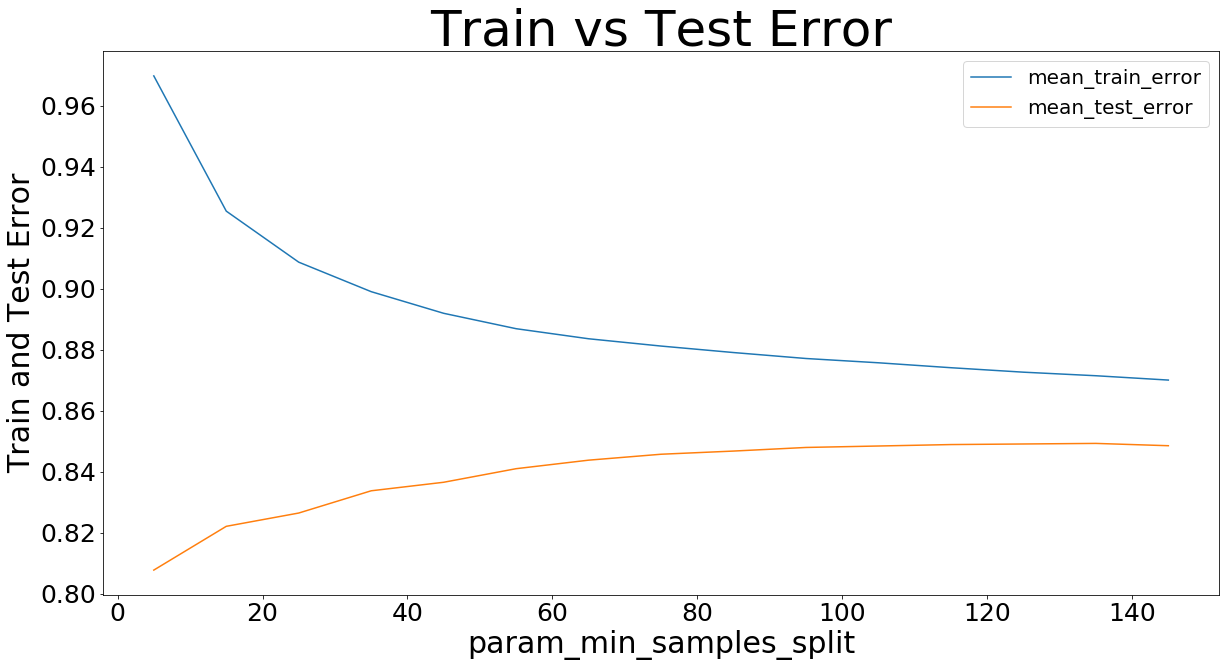

In [35]:
plot_data(splits,'param_min_samples_split')

### Predicting  HyperParameters Together

In [36]:
together = GridSearch(X_train,Y_train,10,{'criterion':['gini','entropy']})
together.head()

Accuracy =  0.8061857623265287
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.128811,0.003424,0.002288,0.000273,gini,{'criterion': 'gini'},0.805398,0.794508,0.793561,0.795831,0.791568,0.800095,0.801990,0.815727,0.797726,0.805306,0.800171,0.006882,2,0.999947,1.0,1.0,0.999947,0.999947,0.999947,0.999947,0.999947,0.999947,0.999947,0.999958,0.000021
1,0.192418,0.005098,0.002244,0.000256,entropy,{'criterion': 'entropy'},0.808712,0.803030,0.807292,0.794410,0.804832,0.810043,0.810516,0.813359,0.802463,0.807200,0.806186,0.005079,1,0.999947,1.0,1.0,0.999947,0.999947,0.999947,0.999947,0.999947,0.999947,0.999947,0.999958,0.000021


In [37]:
together = GridSearch(X_train,Y_train,10,{'max_depth': range(2,30,2),'min_samples_leaf':range(5,150,10),
                                         'min_samples_split':range(5,150,10),'criterion':['entropy','gini']})

Accuracy =  0.8549235068441244
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=35, min_samples_split=95,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sparsh/anaconda3/lib/pyth

In [38]:
together.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.030093,0.002595,0.001613,0.000059,entropy,2,5,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.824337,0.816288,0.825758,0.824254,0.819043,0.828517,0.829938,0.818096,0.821412,0.829465,0.823711,0.004621,5851,0.823641,0.824536,0.823483,0.82365,0.824229,0.823177,0.823019,0.824334,0.823966,0.823071,0.823711,0.000513
1,0.029436,0.000942,0.001743,0.000194,entropy,2,5,15,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.824337,0.816288,0.825758,0.824254,0.819043,0.828517,0.829938,0.818096,0.821412,0.829465,0.823711,0.004621,5851,0.823641,0.824536,0.823483,0.82365,0.824229,0.823177,0.823019,0.824334,0.823966,0.823071,0.823711,0.000513
2,0.030369,0.000562,0.001714,0.000179,entropy,2,5,25,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.824337,0.816288,0.825758,0.824254,0.819043,0.828517,0.829938,0.818096,0.821412,0.829465,0.823711,0.004621,5851,0.823641,0.824536,0.823483,0.82365,0.824229,0.823177,0.823019,0.824334,0.823966,0.823071,0.823711,0.000513
3,0.030050,0.000569,0.001716,0.000171,entropy,2,5,35,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.824337,0.816288,0.825758,0.824254,0.819043,0.828517,0.829938,0.818096,0.821412,0.829465,0.823711,0.004621,5851,0.823641,0.824536,0.823483,0.82365,0.824229,0.823177,0.823019,0.824334,0.823966,0.823071,0.823711,0.000513
4,0.029863,0.000698,0.001774,0.000238,entropy,2,5,45,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.824337,0.816288,0.825758,0.824254,0.819043,0.828517,0.829938,0.818096,0.821412,0.829465,0.823711,0.004621,5851,0.823641,0.824536,0.823483,0.82365,0.824229,0.823177,0.823019,0.824334,0.823966,0.823071,0.823711,0.000513


### Building the final Model with DecisionTree and predicting the model

In [42]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state = 100,max_depth=16 ,min_samples_leaf =35 ,min_samples_split=95, criterion = 'gini')
d_tree.fit(X_train , Y_train)
y_pred = d_tree.predict(X_test)
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print('Accuracy : ',accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6774
           1       0.74      0.61      0.67      2275

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.84      9049

[[6295  479]
 [ 897 1378]]
Accuracy :  0.847938998784396


In [43]:
d_tree.score(X_test,Y_test)

0.847938998784396